### **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc


**LOading data set**

In [3]:
dataset = pd.read_csv('Diabetes Classification.csv')

x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values


In [4]:
print(x)

[[50 'F' 24 ... 1.4 46.0 4.7]
 [26 'M' 23 ... 2.1 62.0 4.5]
 [33 'M' 21 ... 2.0 46.0 7.1]
 ...
 [67 'M' 24 ... 2.17 70.6 4.73]
 [60 'F' 29 ... 2.85 50.2 7.33]
 [37 'M' 34 ... 2.87 75.5 4.61]]


In [5]:
print(y)

[0 0 0 ... 1 1 1]


**Encoding categorical data**

In [6]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))


In [7]:
print(x)

[[1.0 0.0 0.0 ... 1.4 46.0 4.7]
 [0.0 1.0 0.0 ... 2.1 62.0 4.5]
 [0.0 1.0 0.0 ... 2.0 46.0 7.1]
 ...
 [0.0 1.0 0.0 ... 2.17 70.6 4.73]
 [1.0 0.0 0.0 ... 2.85 50.2 7.33]
 [0.0 1.0 0.0 ... 2.87 75.5 4.61]]


**Spliting data set for logistic regression**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(x_test)

[[1.0 0.0 0.0 ... 1.15 61.0 4.26]
 [1.0 0.0 0.0 ... 4.860753 4.860753 4.860753]
 [1.0 0.0 0.0 ... 3.03 58.5 4.5]
 ...
 [0.0 1.0 0.0 ... 2.46 79.1 7.8]
 [1.0 0.0 0.0 ... 1.46 67.0 6.1]
 [0.0 1.0 0.0 ... 2.46 66.2 3.51]]


C:\Users\anike\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
print(y_pred)

[0 1 0 ... 1 0 0]


Visualising Confusion matrix

Confusion Matrix:
[[550  66]
 [106 305]]
Accuracy Score: 0.8325219084712756
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       616
           1       0.82      0.74      0.78       411

    accuracy                           0.83      1027
   macro avg       0.83      0.82      0.82      1027
weighted avg       0.83      0.83      0.83      1027



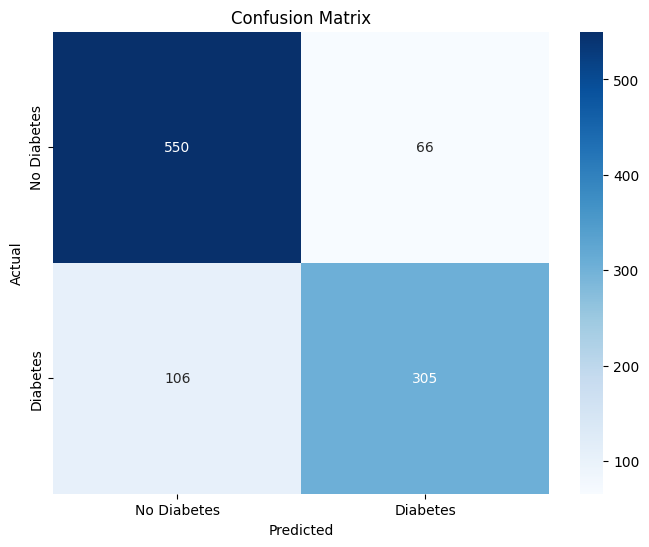

In [10]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
print(x_train.shape)

(4105, 11)


In [ ]:
print("hey")


predict = input("Want to predict more values (y/n) ? : ")
if predict.lower() == 'y' :
    x_live = input("Enter data in sequence: Gender(M/F) Age BMI Chol TG HDL LDL Cr BUN: ").strip().split(" ")
    gender = x_live[0].strip().strip("'\"").upper()

    new = []  # start with an empty list
    new.append(gender)

    for i in range(1, 9):
        new.append(float(x_live[i]))

    new = np.array([new], dtype=object) 
            
    
    try :
       y = ct.transform(new)
       print(y)
    except Exception as e:
       print(e)
    
    
    while True:
        x_live = input("Enter data in sequence: Age Gender(M/F) BMI Chol TG HDL LDL Cr BUN: ").strip().split(" ")
        if not x_live or x_live[0] == '':
            break

        # Manual encoding: assuming Gender is 2nd input (index 1)
        gender = x_live[1].upper()
        if gender == 'M':
            x_live[1] = 1
        elif gender == 'F':
            x_live[1] = 0
        else:
            print("Invalid gender. Use M or F.")
            continue

        try:
            # Convert everything to float
            x_live = np.array([float(val) for val in x_live]).reshape(1, -1)
        except ValueError:
            print("Please enter only numeric values (after encoding Gender).")
            continue

        # Apply same preprocessing as training
        x_live_transformed = ct.transform(x_live)  # Use transform, not fit_transform!
        print("Transformed input:", x_live_transformed)

        y_live = model.predict(x_live_transformed)
        print("Prediction:", y_live)


        